# 1 Preparation
## 1.1 Load Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from brewer2mpl import qualitative
import brewer2mpl

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

# set default figure settings
plt.rcParams['figure.figsize'] = (10.0,5.0)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 

## 1.2 Load Data

In [82]:
file = pd.ExcelFile('Case Data.xlsx')
file.sheet_names

['definitions', 'data tabs>', 'datatab_1', 'datatab_2', 'datatab_3']

In [83]:
df1 = pd.read_excel(file, 'datatab_1',header=2)
df1 = df1[['date','platform','email_key','sessions','pageviews']]
df1.head()

,date,platform,email_key,sessions,pageviews
0,2018-02-06,Phone web,suggested_skills,2262,20181
1,2018-02-01,Phone web,pmt_purchase_receipt,12,85
2,2018-02-01,Phone web,async_import,26,291
3,2018-02-07,Desktop,cap_proj_shrd,28,155
4,2018-02-04,Desktop,lss_contract_termination_email,2,2


In [84]:
df2 = pd.read_excel(file, 'datatab_2',header=2)
df2.head()

,email_key,emailkey_group
0,second_guest_reminder_01,m2g_reminder
1,inmail_declined,onetoone_message
2,lss_welcome,other
3,tickleMidYearInReview_C,consumer_marketing
4,contact_notifications_back_lookup,consumer_marketing


In [85]:
df3 = pd.read_excel(file, 'datatab_3',header=2)
df3.head()

,date,email_key,sends
0,2018-02-07,recommendation_received,10786
1,2018-02-04,accept_invite_04,12031306
2,2018-02-06,cap_proj_shrd,828
3,2018-02-03,company_admin_added,4462
4,2018-02-06,lss_welcome_admin,37


## 1.3 Join Tables 

In [105]:
# left join df1 and df3 on date
df = pd.merge(df1, df3, on=['date','email_key'], how='left')

df = pd.merge(df, df2, on='email_key', how='left')

df.head()

,date,platform,email_key,sessions,pageviews,sends,emailkey_group
0,2018-02-06,Phone web,suggested_skills,2262,20181,NaN,consumer_marketing
1,2018-02-01,Phone web,pmt_purchase_receipt,12,85,6639.0,other
2,2018-02-01,Phone web,async_import,26,291,6722.0,other
3,2018-02-07,Desktop,cap_proj_shrd,28,155,116.0,other
4,2018-02-04,Desktop,lss_contract_termination_email,2,2,325.0,other


## 1.4 File structure and content


In [94]:
df1.shape

(3813, 5)

In [95]:
df2.shape

(307, 2)

In [96]:
df3.shape

(1111, 3)

In [97]:
df3.describe()

,sends
count,1.111000e+03
mean,1.362227e+06
std,6.351163e+06
min,1.000000e+00
25%,9.100000e+01
50%,2.300000e+03
75%,6.855650e+04
max,7.658629e+07


In [98]:
df.shape

(3813, 7)

## 1.5 Missing values

In [99]:
df1.isnull().sum()

date         0
platform     0
email_key    0
sessions     0
pageviews    0
dtype: int64

In [54]:
df2.isnull().sum()

email_key         0
emailkey_group    0
dtype: int64

In [55]:
df3.isnull().sum()

date         0
email_key    0
sends        0
dtype: int64

In [100]:
df.isnull().sum()

date                0
platform            0
email_key           0
sessions            0
pageviews           0
sends             437
emailkey_group     78
dtype: int64

## 1.6 Drop NAs

In [108]:
df=df.dropna() 

In [109]:
df.isnull().sum()

date              0
platform          0
email_key         0
sessions          0
pageviews         0
sends             0
emailkey_group    0
dtype: int64

In [112]:
df.shape

(3376, 7)

# 2 Feature Exploration
## 2.1 Categories & Count
### 2.1.1 Platform

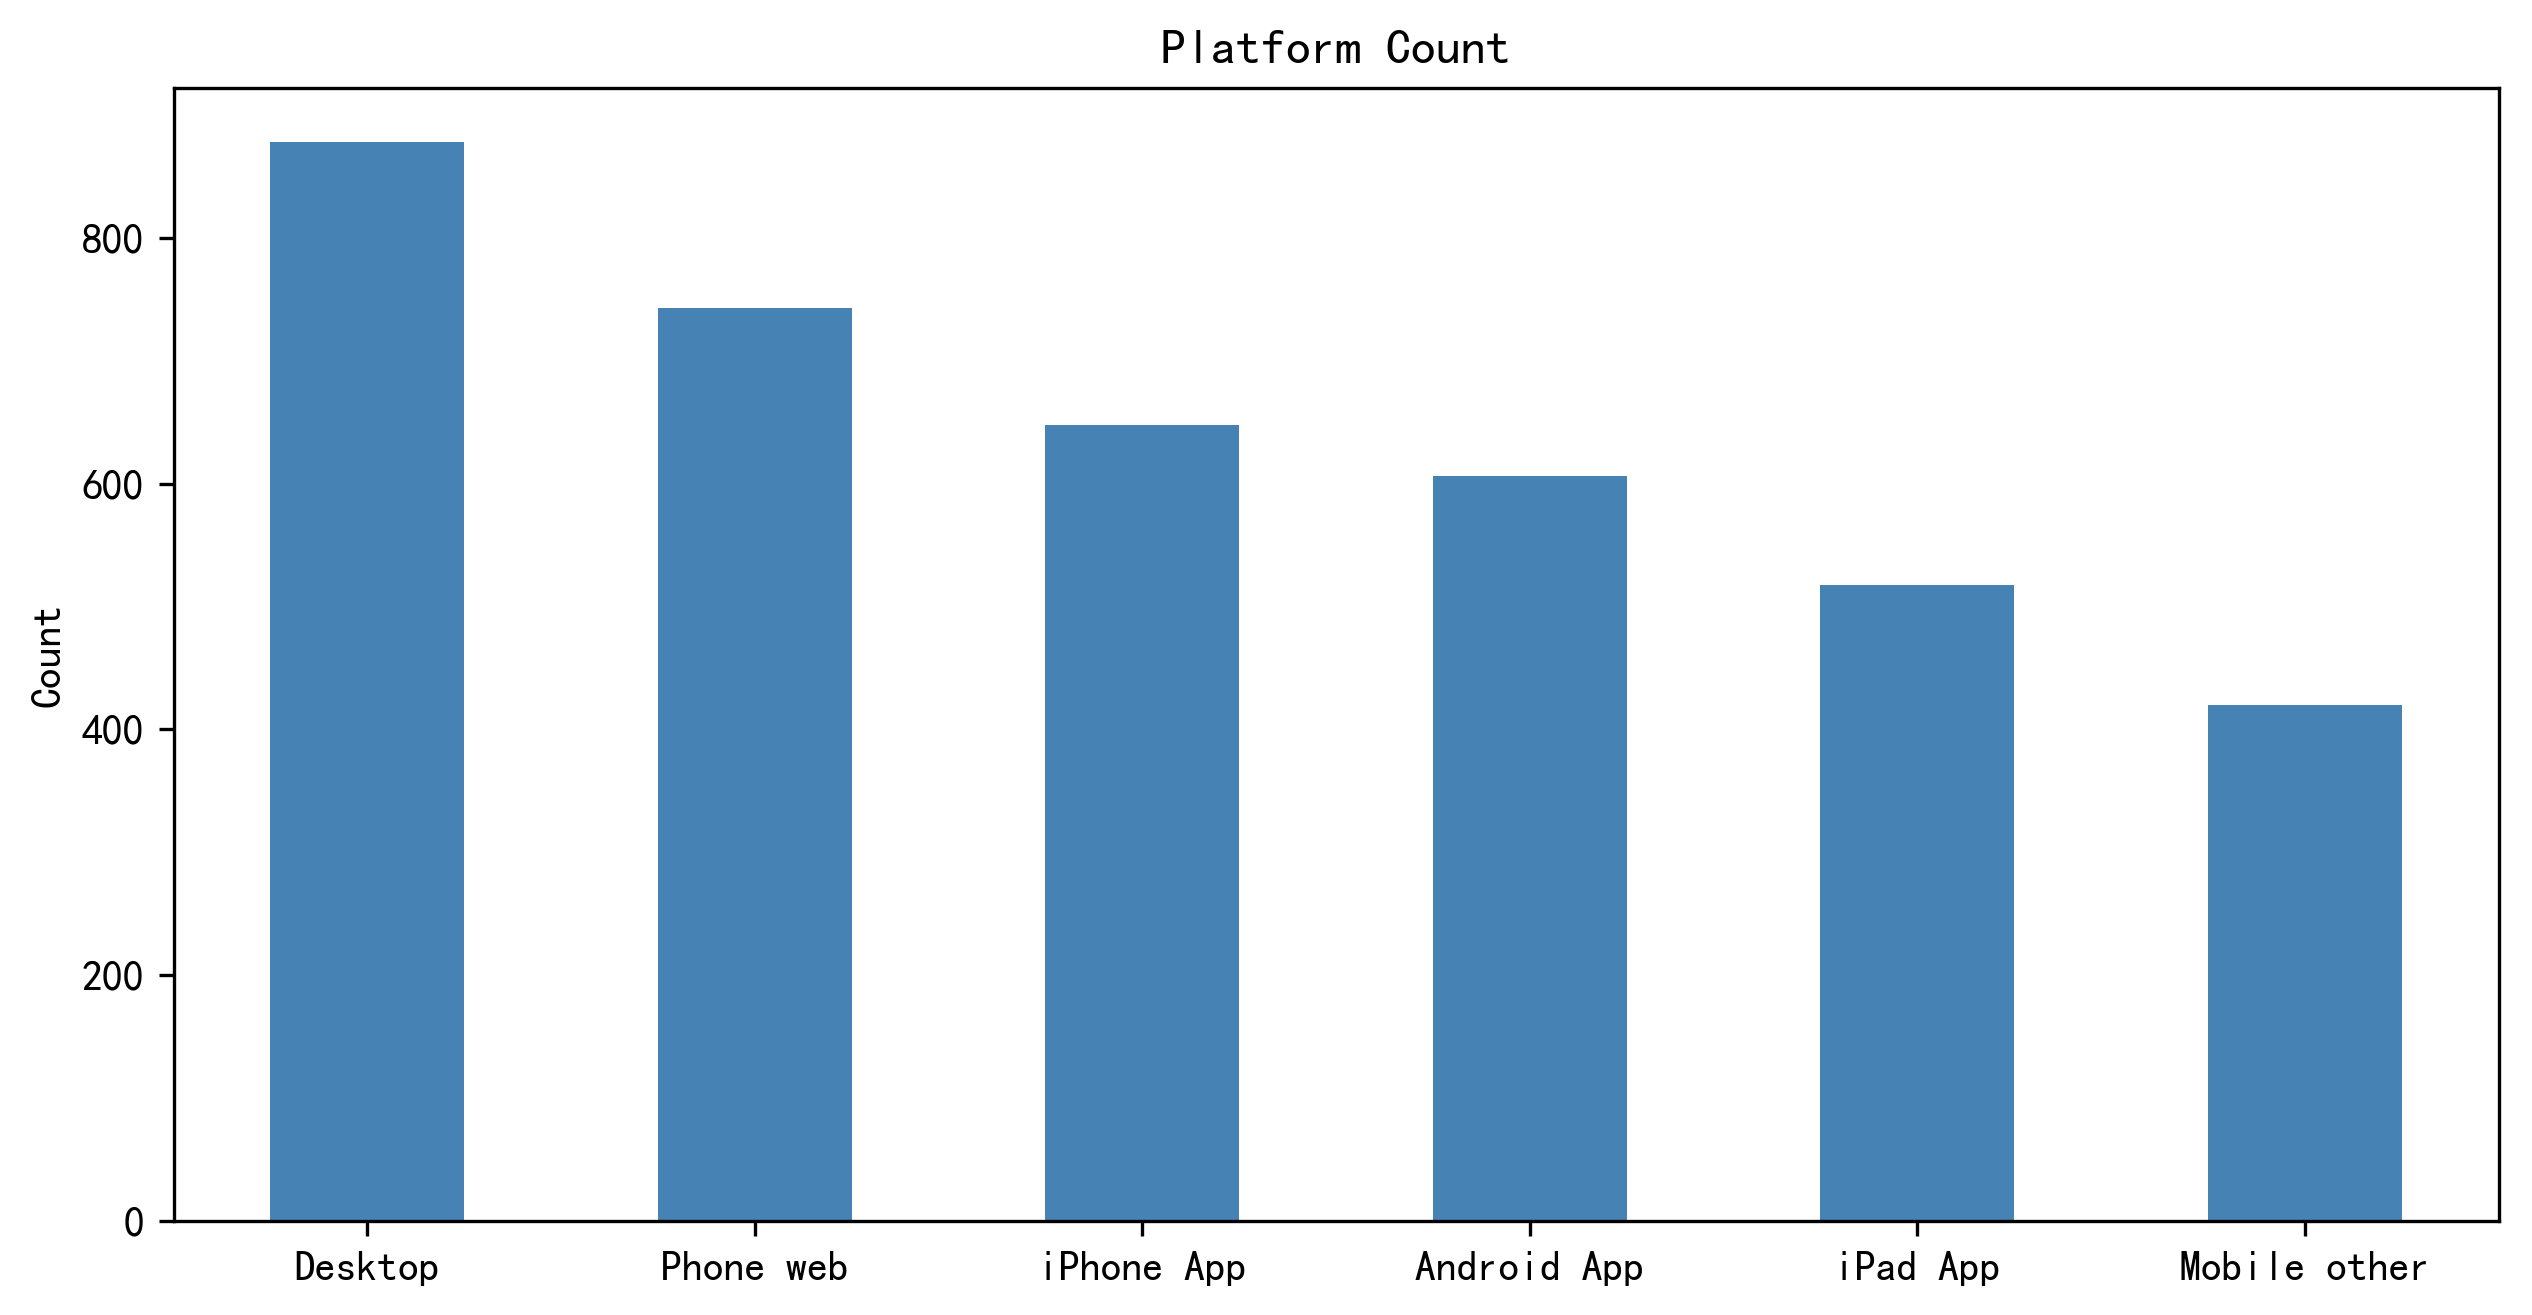

In [58]:
df1['platform'].value_counts().plot.bar(color='steelblue',rot=0)
plt.ylabel('Count')
plt.title('Platform Count')
plt.show()

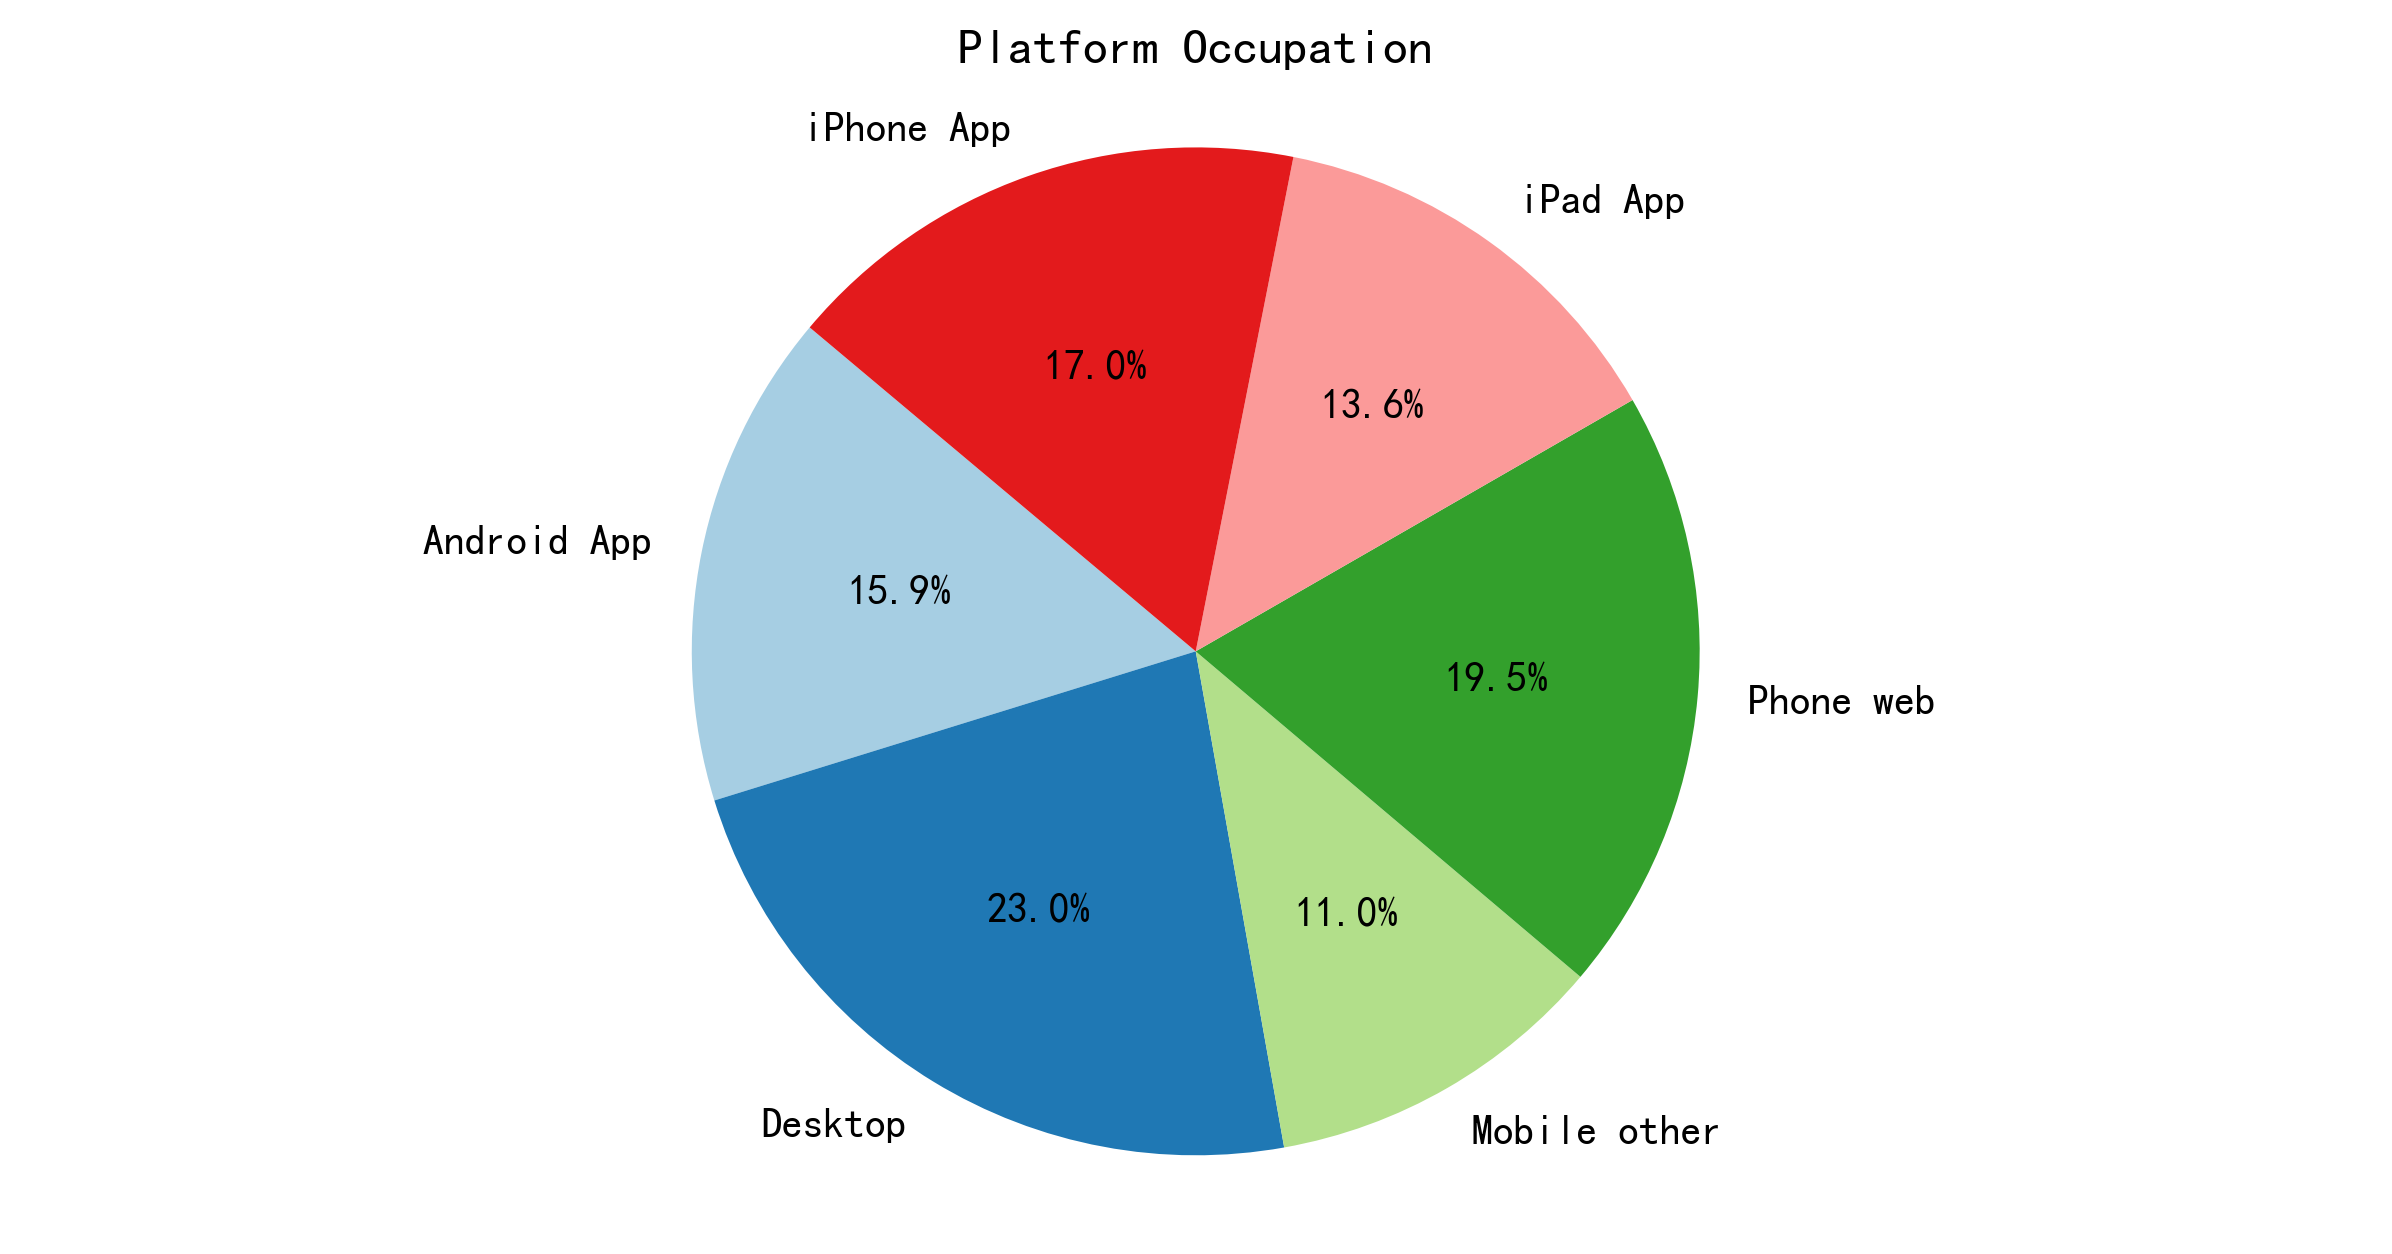

In [64]:
bmap = brewer2mpl.get_map('Paired', 'Qualitative', 12)
df_1 = pd.DataFrame(df1.groupby('platform').size().reset_index(name='count'))
plt.pie(df_1['count'], labels=df_1['platform'],  colors = bmap.mpl_colors, autopct='%1.1f%%', startangle=140)
plt.title('Platform Occupation')
plt.axis('equal')
plt.show()

### 2.1.2 Emailkey_group

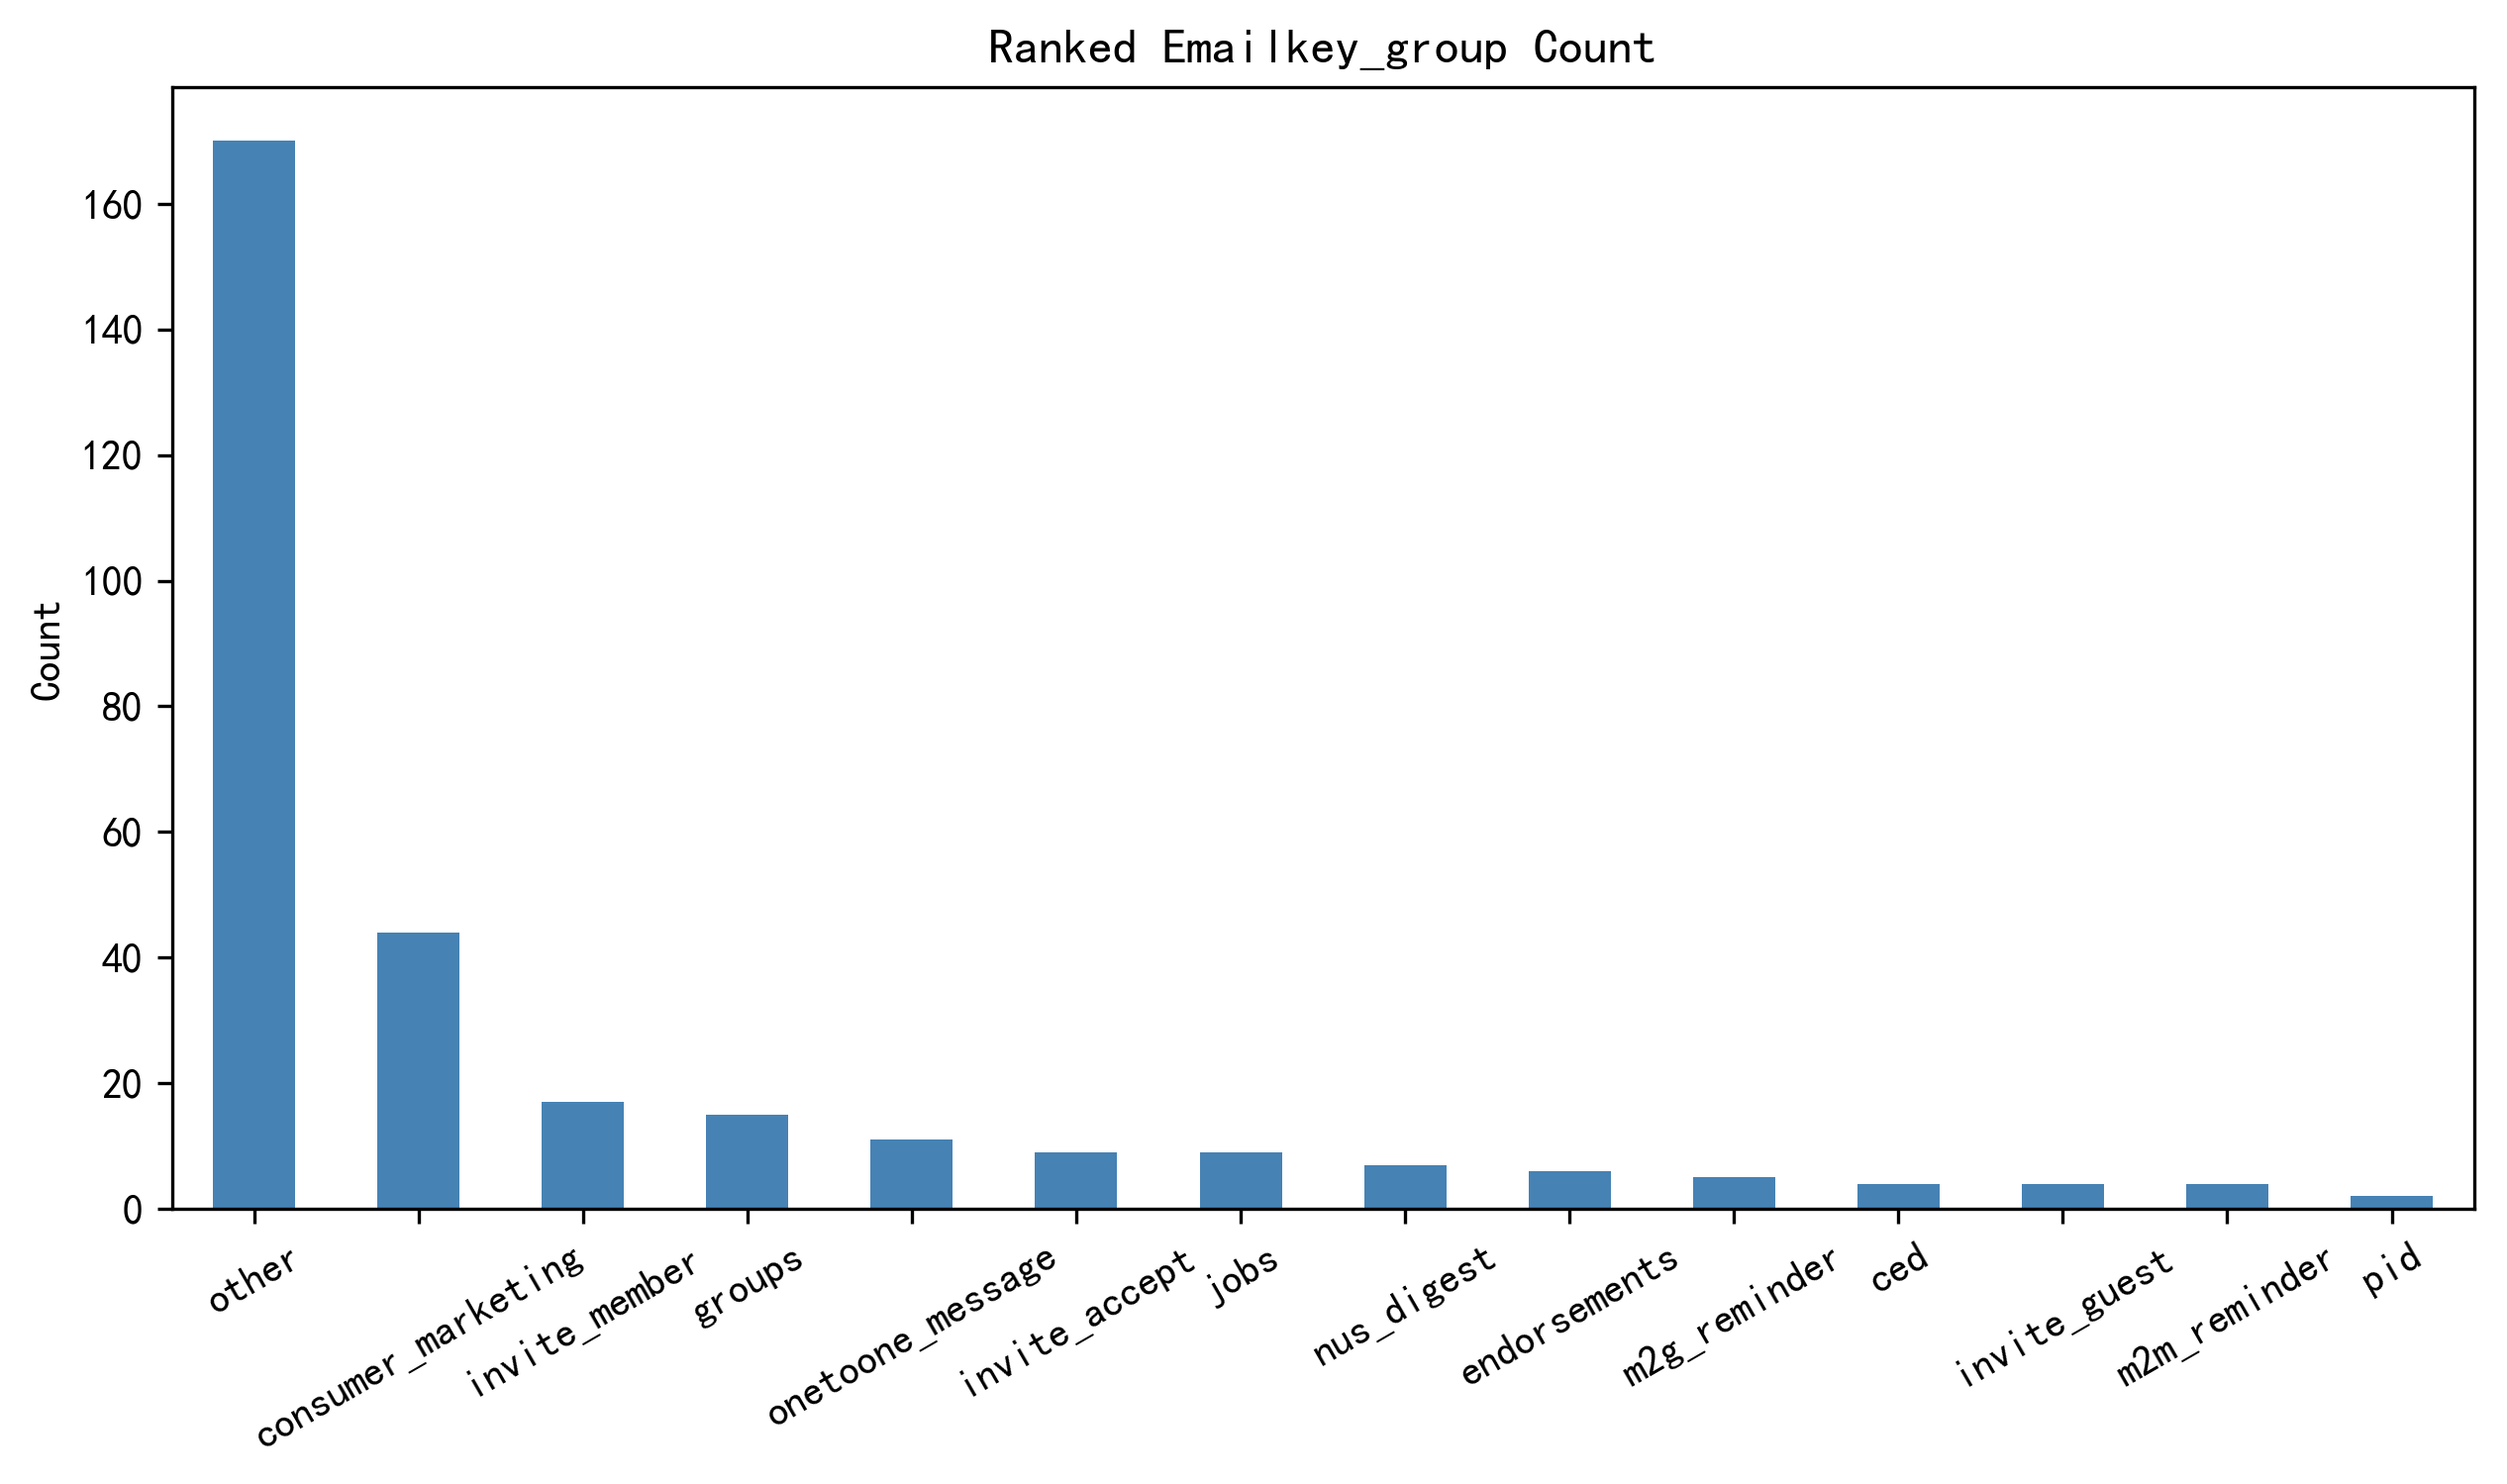

In [66]:
# df['emailkey_group'].value_counts().plot.bar(color='steelblue')
# plt.ylabel('Count')
# plt.title('Emailkey_group Distribution')
# plt.show()

df2['emailkey_group'].value_counts()[:].plot.bar(color = 'steelblue',rot=30)
plt.ylabel('Count')
plt.title('Ranked Emailkey_group Count By datatab_1')
plt.show()

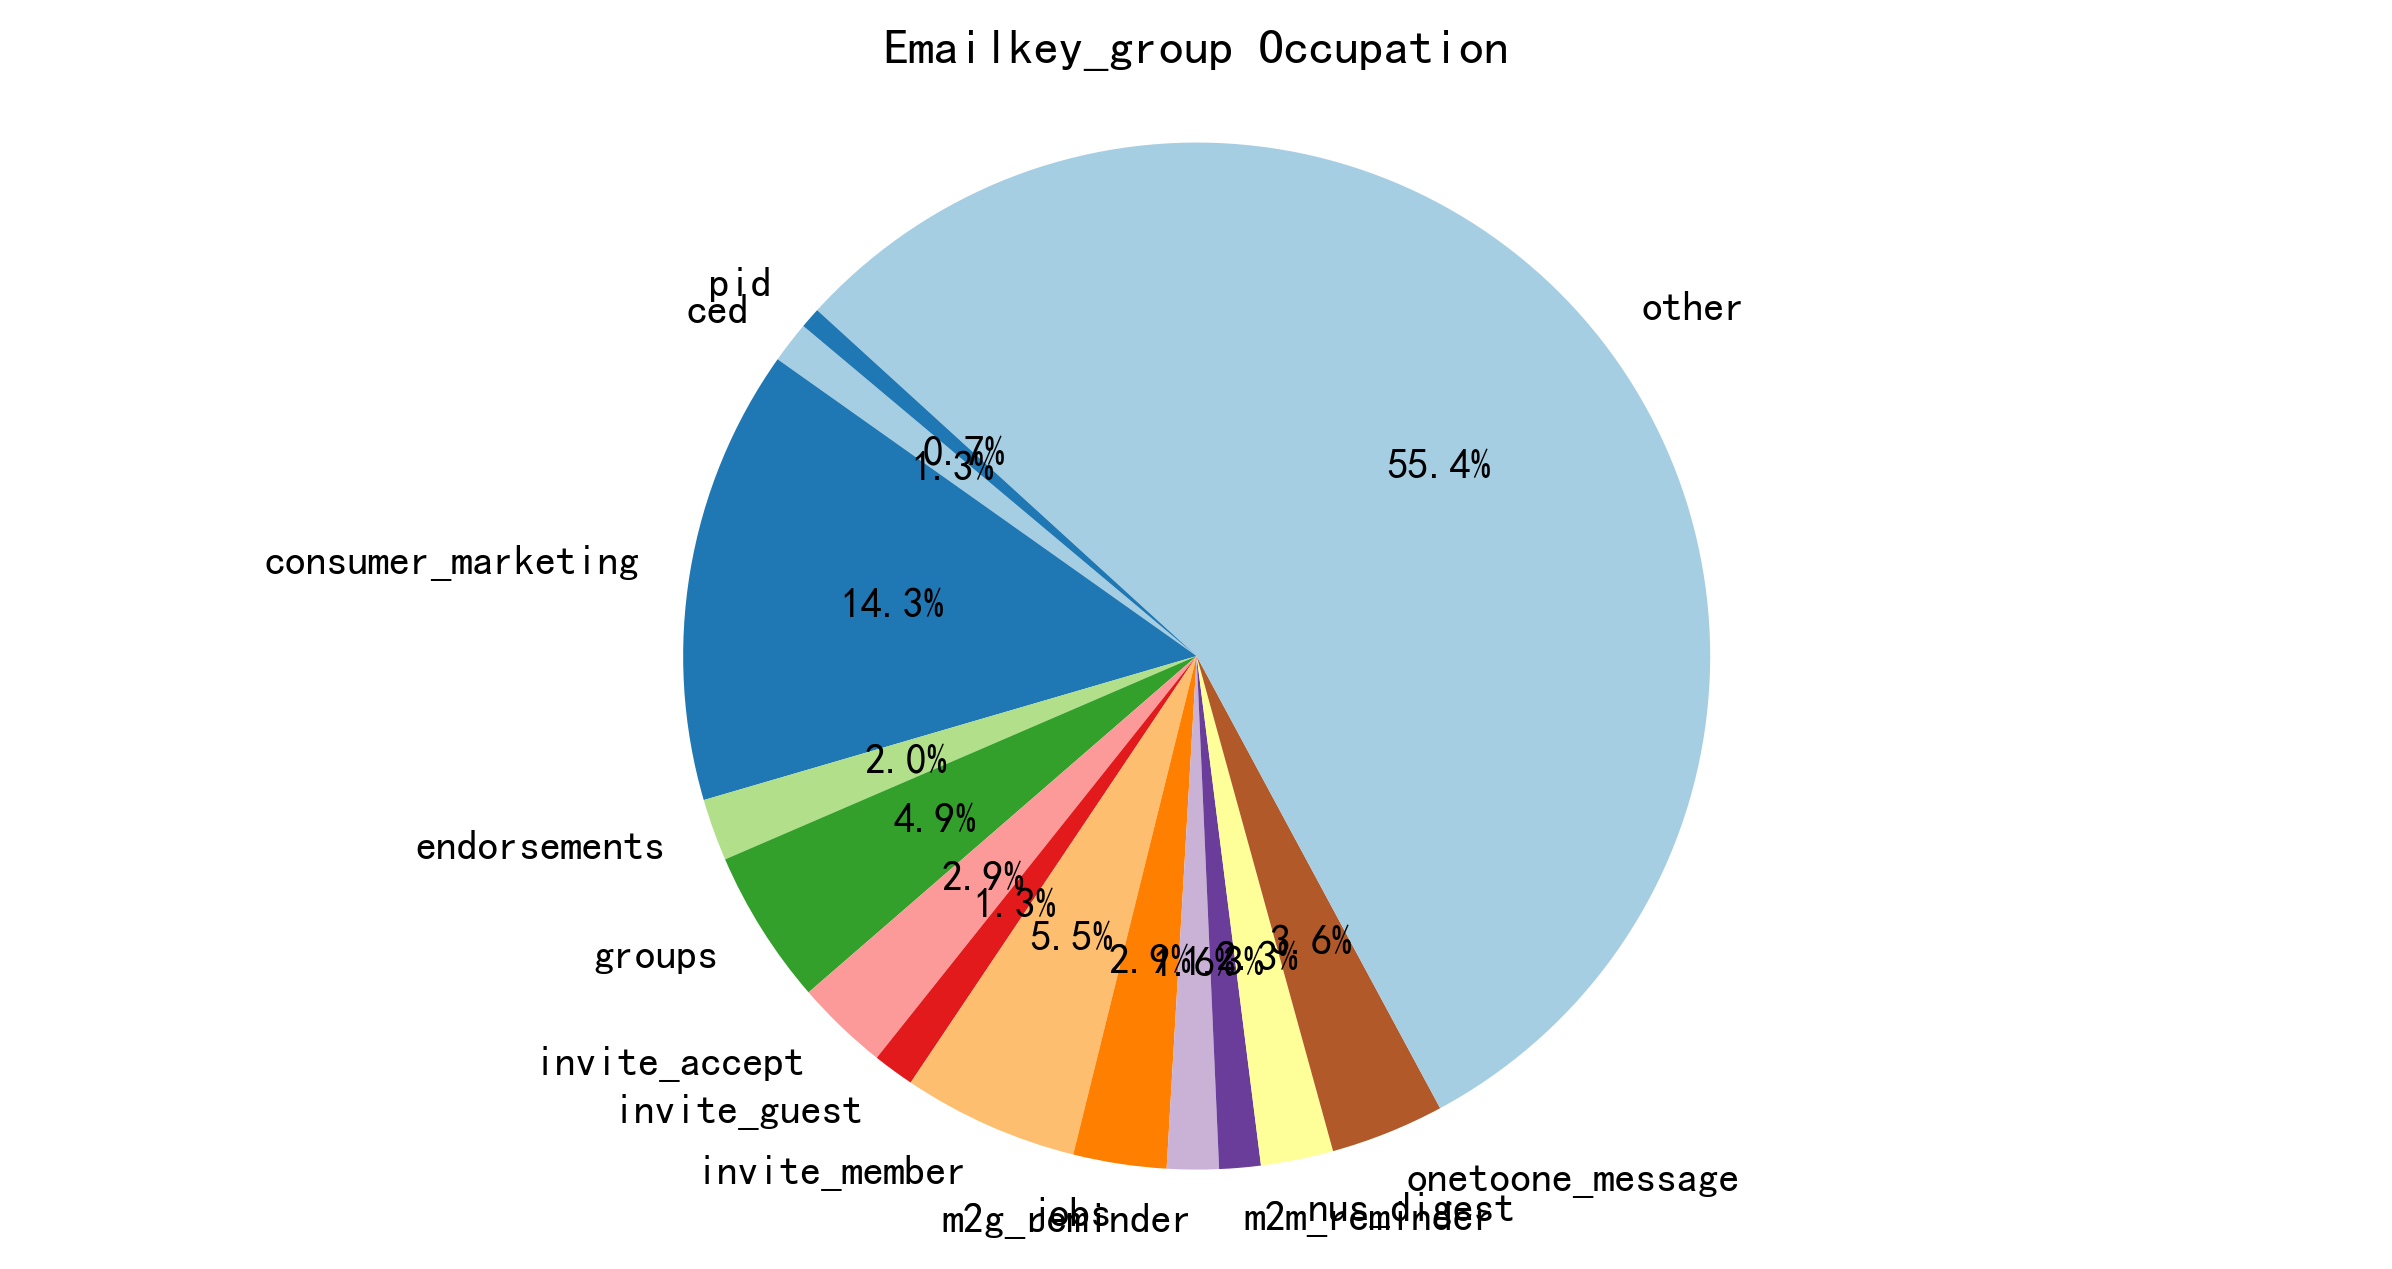

In [67]:
df_2 = pd.DataFrame(df2.groupby('emailkey_group').size().reset_index(name='count'))
plt.pie(df_2['count'], labels=df_2['emailkey_group'],  colors = bmap.mpl_colors, autopct='%1.1f%%', startangle=140)
plt.title('Emailkey_group Occupation By datatab_1')
plt.axis('equal')
plt.show()

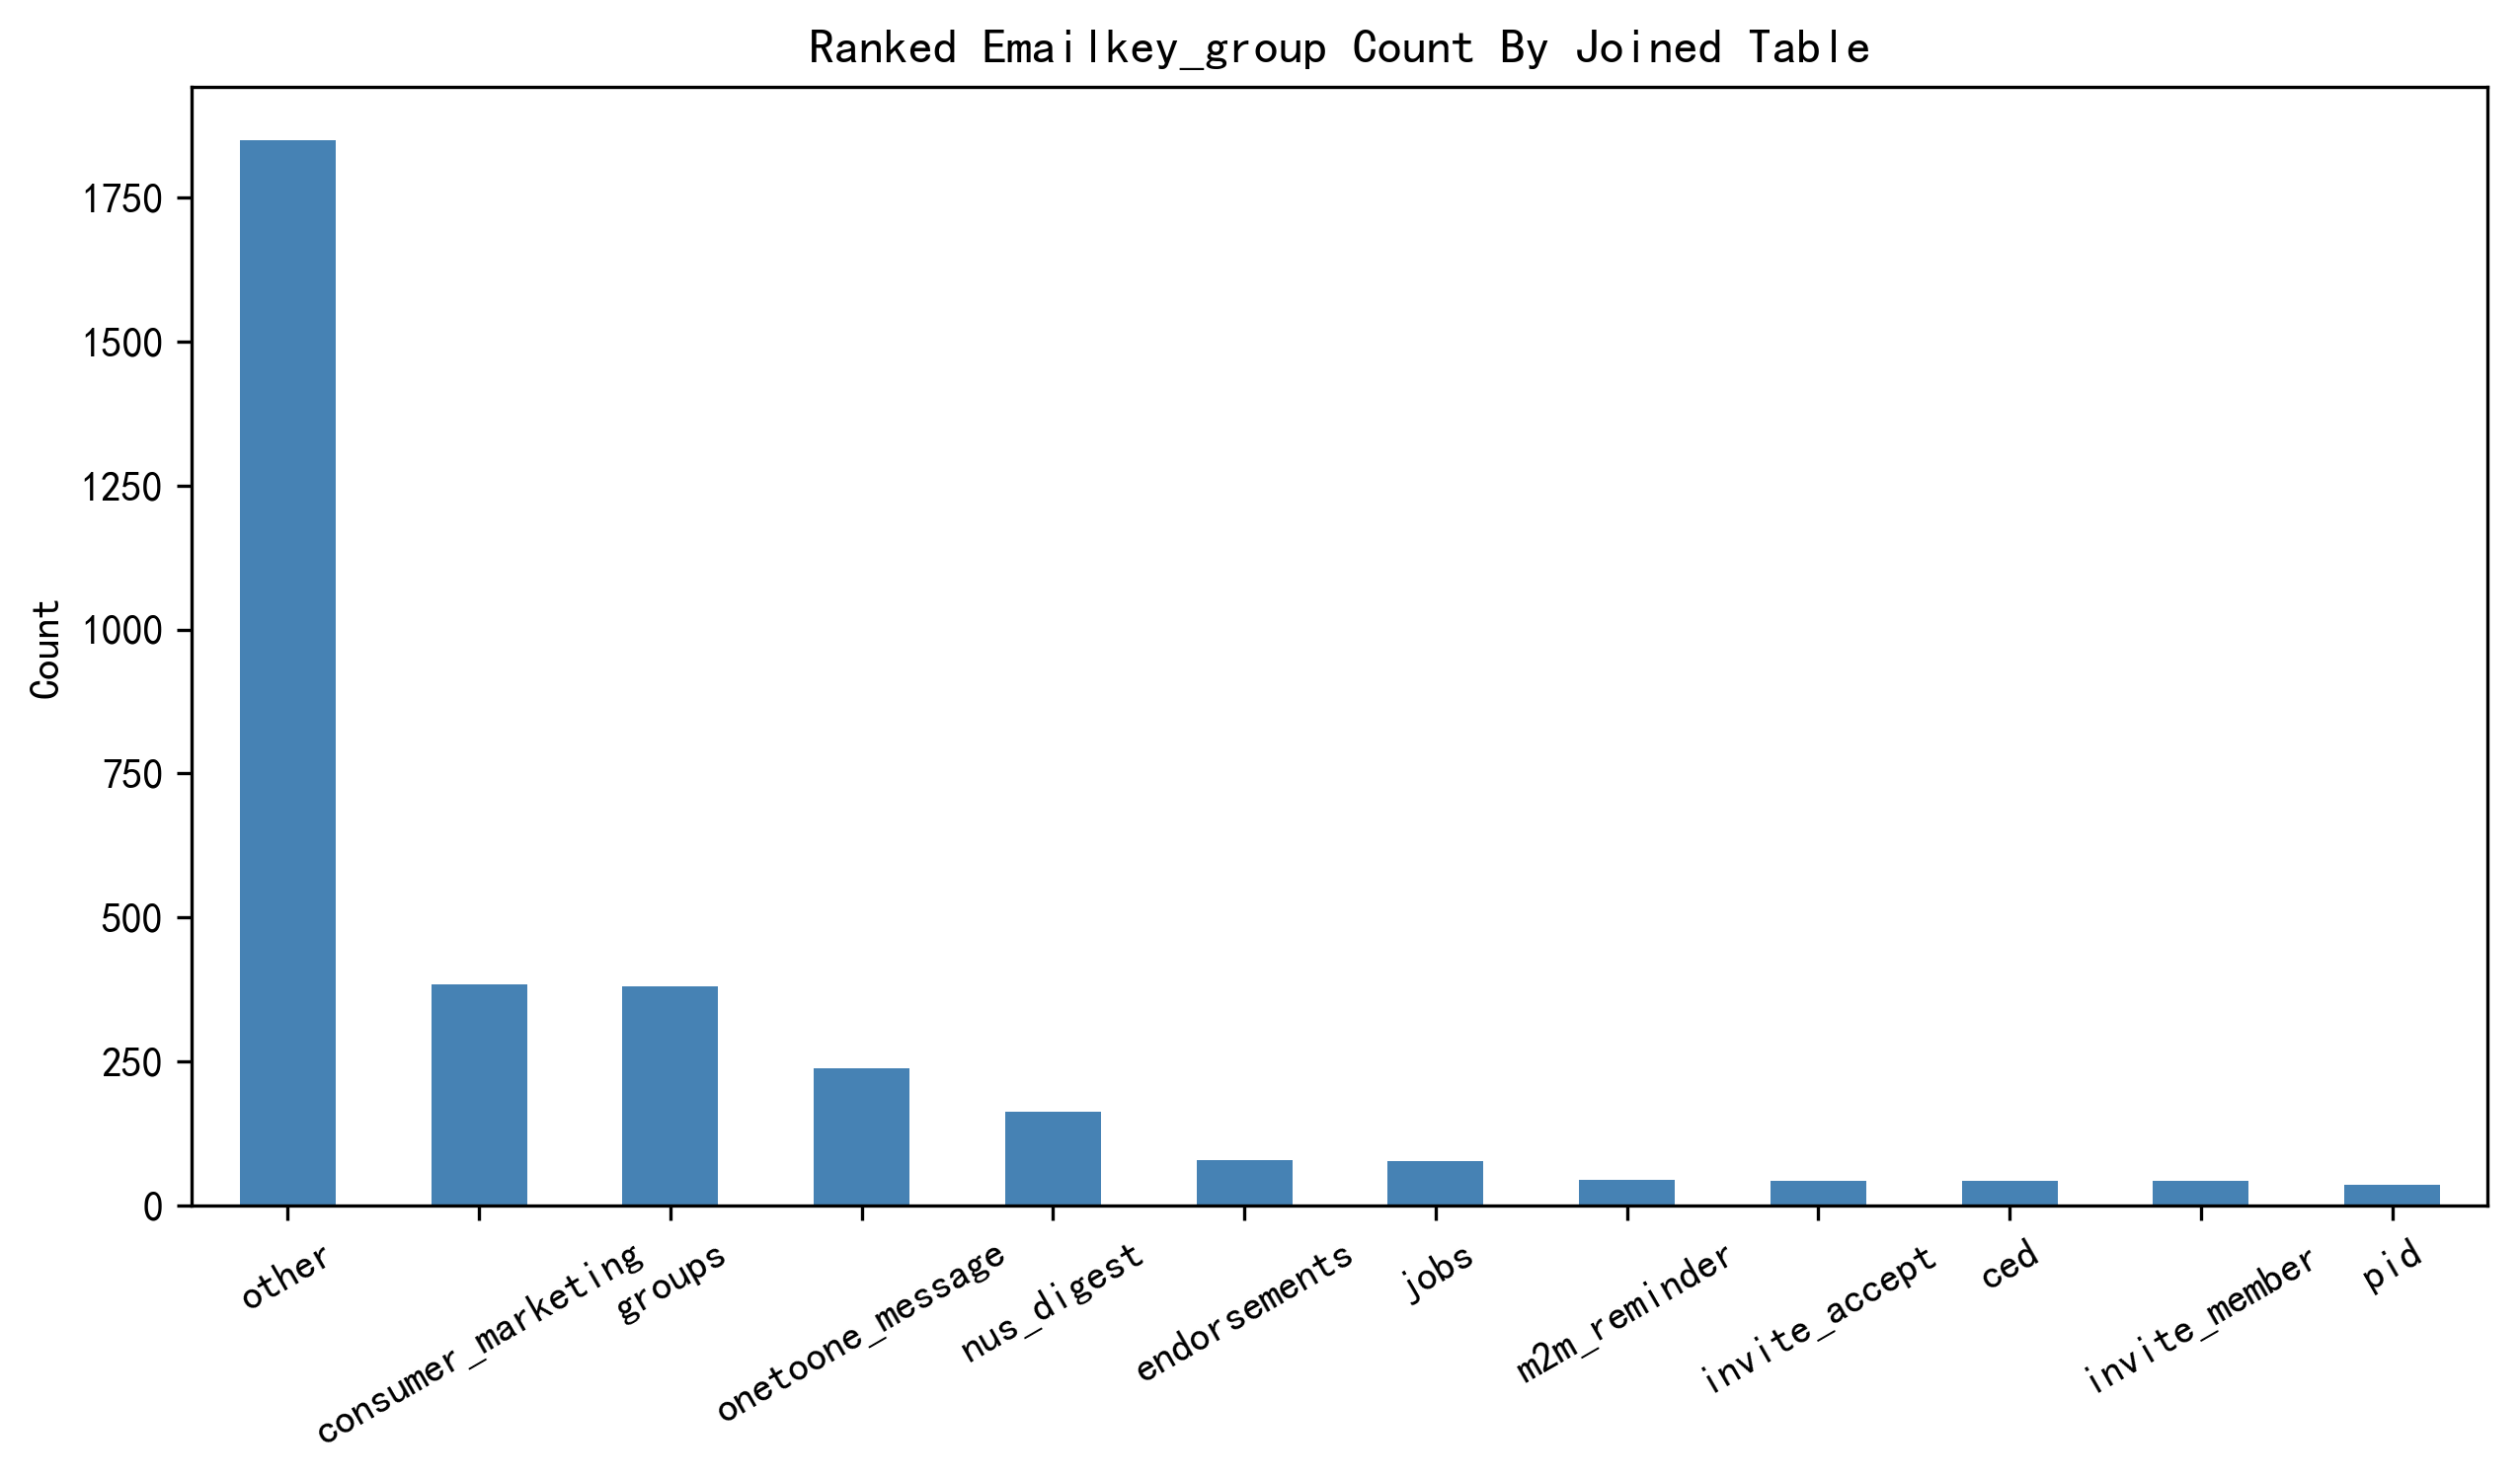

In [116]:
df['emailkey_group'].value_counts()[:].plot.bar(color = 'steelblue',rot=30)
plt.ylabel('Count')
plt.title('Ranked Emailkey_group Count By Joined Table')
plt.show()

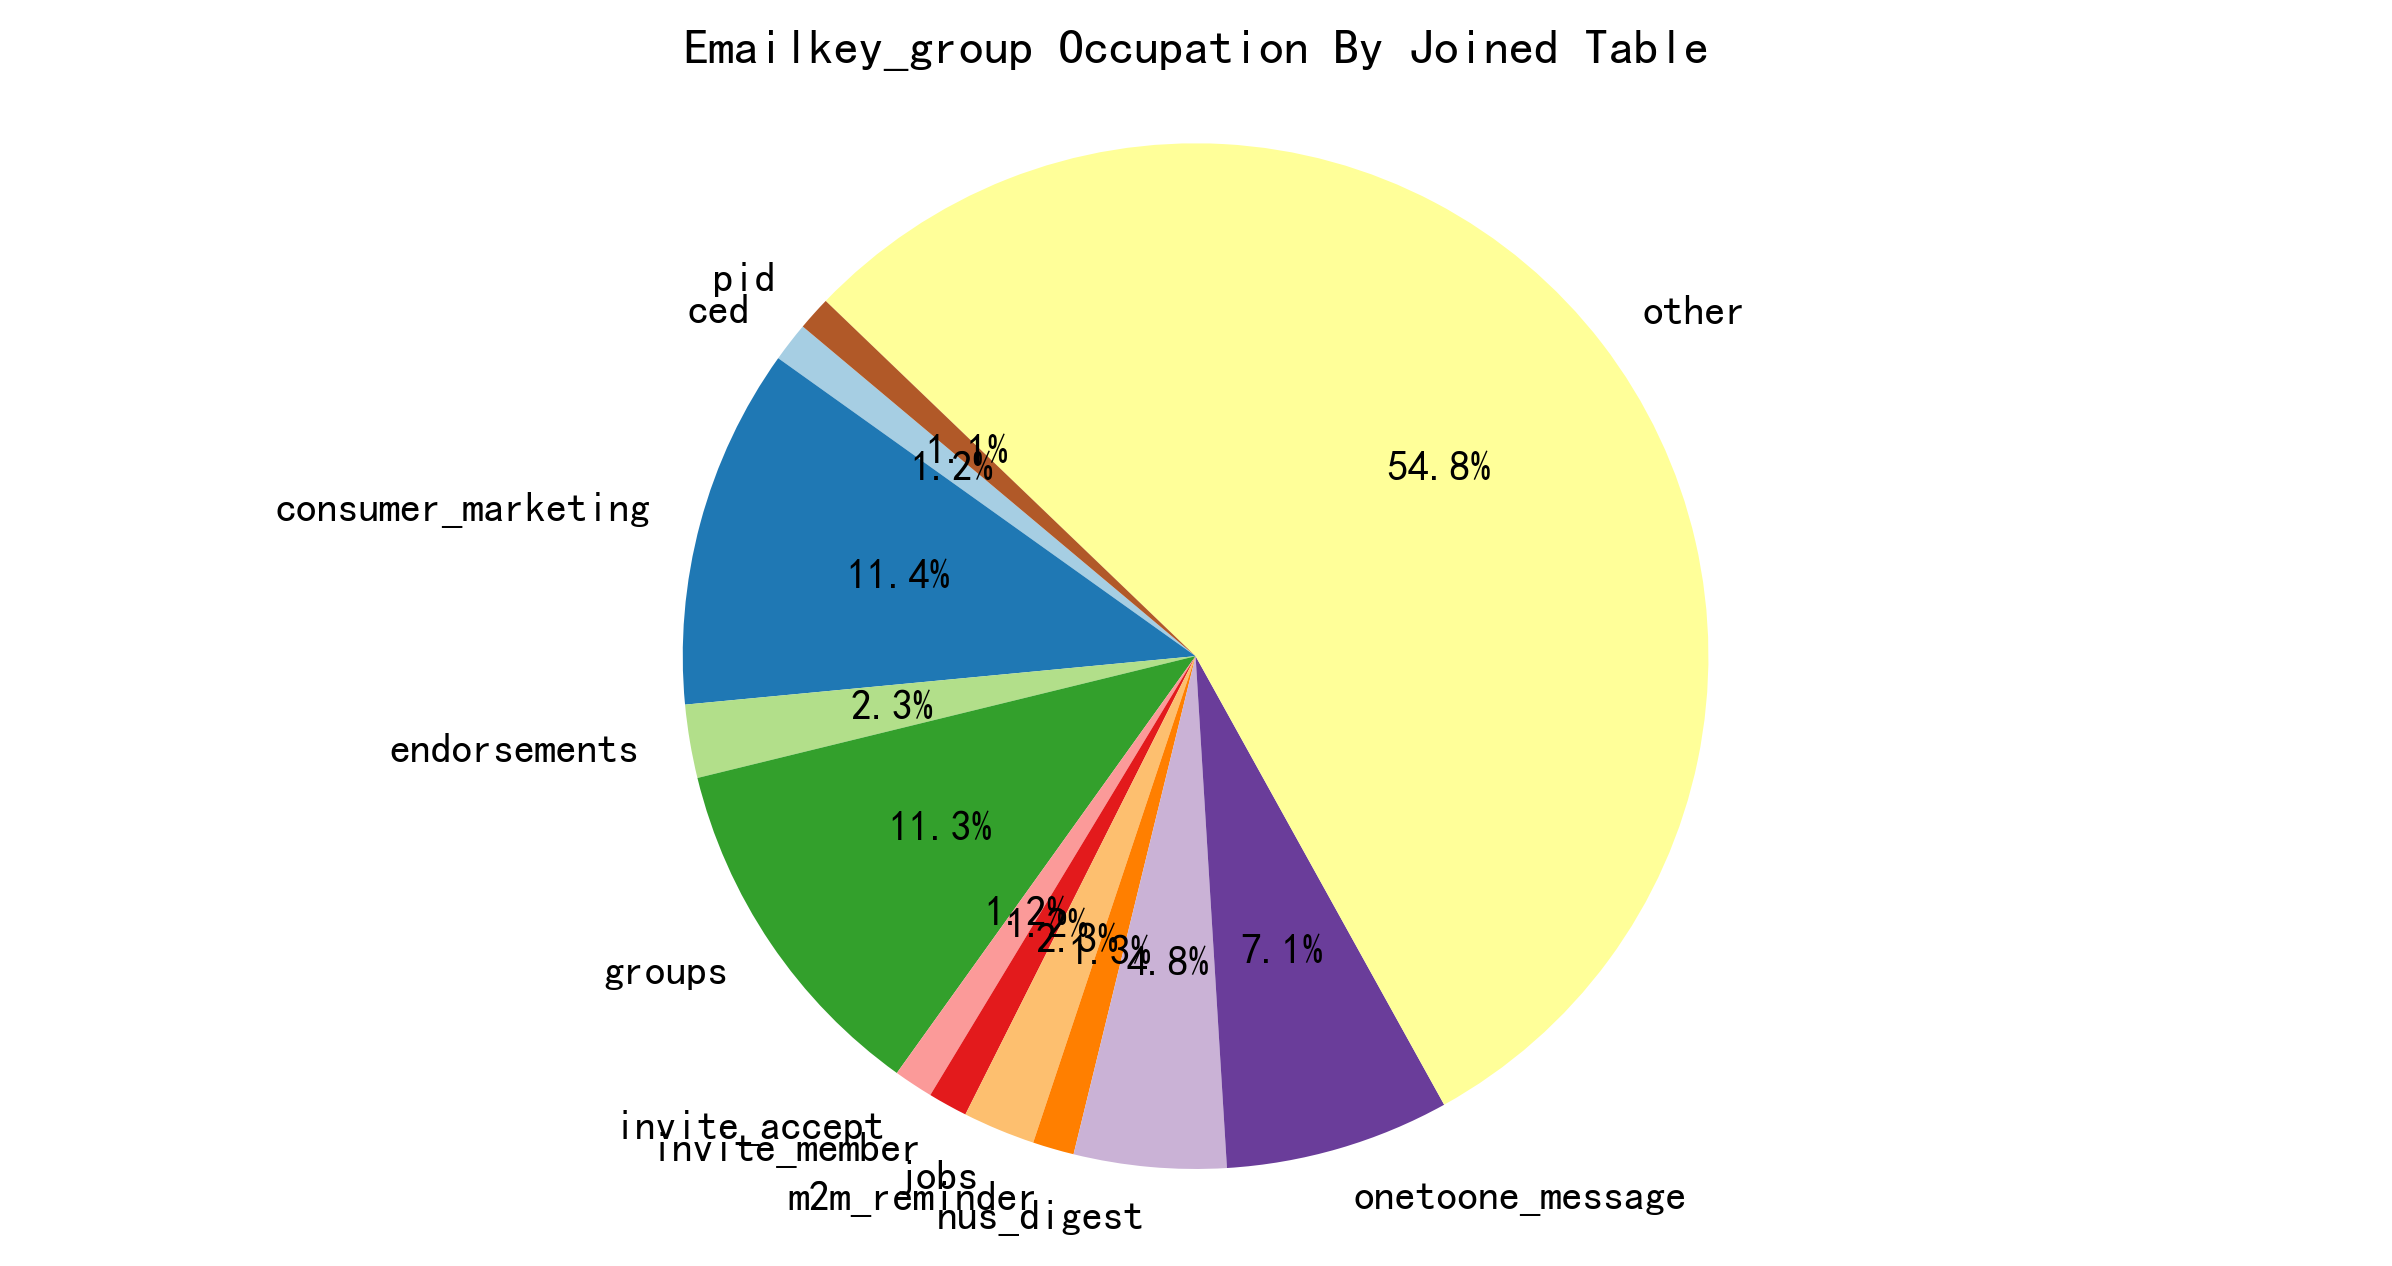

In [118]:
df_21 = pd.DataFrame(df.groupby('emailkey_group').size().reset_index(name='count'))
plt.pie(df_21['count'], labels=df_21['emailkey_group'],  colors = bmap.mpl_colors, autopct='%1.1f%%', startangle=140)
plt.title('Emailkey_group Occupation By Joined Table')
plt.axis('equal')
plt.show()

We can tell the both consummer_marketing group and groups has relative high percentage 11.4% and 11.3%. Due to the limited amount of data, we should apply the available data as much as possible. Thus, I think the result generated by the joined table is more valuable.
## 2.2 Correlation 

In [123]:
df.dtypes

date              datetime64[ns]
platform                  object
email_key                 object
sessions                   int64
pageviews                  int64
sends                    float64
emailkey_group            object
dtype: object

In [122]:
corr.style.background_gradient(cmap='coolwarm')

,sessions,pageviews,sends
sessions,1,0.986593,0.297714
pageviews,0.986593,1,0.291021
sends,0.297714,0.291021,1


We can conclude that sessions and pageviews are highly correlated.

# 3 Modeling
## 3.1 Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression

### 3.1.1  One-hot encoded 

In [ ]:
#.......
# Sorry I ran out of the time

# Questions
## Using only the data given, which e-mail key group should we prioritize to build first for this push notification? 

#### I think we should prioritize consummer_marketing group and groups.

## Once you have chosen the e-mail key group to prioritize, please estimate how many incremental page views this new push notification could drive? (you may need to make some assumptions here)

#### I will estimate that the incremental view would be around 5%. To verify the assumption, I will do A/B testing to see the performance from different groups. 
